In [5]:
import pandas as pd
import numpy as np

In [135]:
acquired_dict = {
    "Traded": "tr",
    "Free Agency": "fa",
    "Amateur Draft": "dr",
    "Amateur Free Agent": "fa",
    "Waivers": "tr",
    "Purchased":"tr",
    "Rule 5 Draft": "dr",
    "Expansion Draft": "dr",
    "Conditional Deal": "tr",
    "Amateur Draft--no sign": "dr",
    "MinorLg Draft": "dr",
    "Rune 5 returned": "tr"
}

def inflation_calc(row):
    inf_dict = {2017: 1.0,
 2016: 1.021299290023666,
 2015: 1.0341874211554445,
 2014: 1.0354149770208165,
 2013: 1.0522113523096537,
 2012: 1.0676237183898534,
 2011: 1.089717656786951,
 2010: 1.1241149062626115,
 2009: 1.1425534989302544,
 2008: 1.1384885486964882,
 2007: 1.1822013870802828,
 2006: 1.215873015873016,
 2005: 1.2550947260624679,
 2004: 1.297617787188989,
 2003: 1.3324635790389214,
 2002: 1.3626862352679565,
 2001: 1.3843112893206078,
 2000: 1.4234610917537749}
    return row['salary']*inf_dict[row['year']]

In [138]:
train = pd.read_pickle('batting_00_16.pkl')
test = pd.read_pickle('batting_17.pkl')

train['acquired'] = train['acquired'].map(acquired_dict)
test['acquired'] = test['acquired'].map(acquired_dict)

train['adj_salary'] = train.apply(inflation_calc,axis=1)
train['log_adj'] = np.log(train['adj_salary'])

test['adj_salary'] = test.apply(inflation_calc,axis=1)
test['log_adj'] = np.log(test['adj_salary'])

train= train[train.pa>200]
test = test[test.pa>200]




print("train: {0}".format(train.shape))
print("test: {0}".format(test.shape))

train: (5395, 29)
test: (315, 29)


In [137]:
train.shape


(5395, 29)

In [134]:
test.shape

(315, 27)

In [8]:
from sklearn import preprocessing

In [9]:
train.columns.tolist()

['rk',
 'name',
 'age',
 'tm',
 'g',
 'pa',
 'rbat',
 'rbaser',
 'rdp',
 'rfield',
 'rpos',
 'raa',
 'waa',
 'rrep',
 'rar',
 'war',
 'waawl%',
 '162wl%',
 'owar',
 'dwar',
 'orar',
 'salary',
 'acquired',
 'pos\xa0summary',
 'bat_hand',
 'year',
 'log_sal']

In [10]:
norm_cols = [ 'g',
 'pa',
 'rbat',
 'rbaser',
 'rdp',
 'rfield',
 'rpos',
 'raa',
 'waa',
 'rrep',
 'rar',
 'war',
 'waawl%',
 '162wl%',
 'owar',
 'dwar',
 'orar',
 'year',]

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(train[norm_cols])
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = norm_cols
train_X = df_normalized


np_scaled = min_max_scaler.fit_transform(test[norm_cols])
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = norm_cols
test_X = df_normalized

In [12]:
train_y = train['log_sal']
test_y = test['log_sal']

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

In [46]:
lr = LinearRegression()

lr.fit(train_X, train_y)

preds = lr.predict(test_X)

error = np.sqrt(MSE(test_y,preds))

print((error))

1.363532086218852


In [15]:
from sklearn.feature_selection import RFE

In [16]:
est = LinearRegression()
selector = RFE(est)
selector.fit(train_X,train_y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=None, step=1, verbose=0)

In [17]:
selector.support_

array([False, False,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False, False,  True, False,  True, False])

In [18]:
selector.ranking_

array([ 3,  2,  1,  6,  9,  1,  5,  1,  1,  1,  1,  1, 10,  7,  1,  4,  1,
        8])

In [19]:
preds = selector.predict(test_X)
error = mean_squared_error(test_y,preds)
print(np.sqrt(error))

2.051578466085642


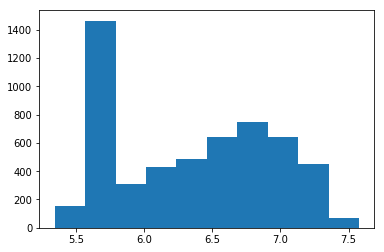

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(train['log10_adj'])
plt.show()

In [99]:
10**6.5

3162277.6601683795

In [22]:
inf_dict = {2017: 1.0,
 2016: 1.021299290023666,
 2015: 1.0341874211554445,
 2014: 1.0354149770208165,
 2013: 1.0522113523096537,
 2012: 1.0676237183898534,
 2011: 1.089717656786951,
 2010: 1.1241149062626115,
 2009: 1.1425534989302544,
 2008: 1.1384885486964882,
 2007: 1.1822013870802828,
 2006: 1.215873015873016,
 2005: 1.2550947260624679,
 2004: 1.297617787188989,
 2003: 1.3324635790389214,
 2002: 1.3626862352679565,
 2001: 1.3843112893206078,
 2000: 1.4234610917537749}

In [23]:
def inflation_calc(row):
    inf_dict = {2017: 1.0,
 2016: 1.021299290023666,
 2015: 1.0341874211554445,
 2014: 1.0354149770208165,
 2013: 1.0522113523096537,
 2012: 1.0676237183898534,
 2011: 1.089717656786951,
 2010: 1.1241149062626115,
 2009: 1.1425534989302544,
 2008: 1.1384885486964882,
 2007: 1.1822013870802828,
 2006: 1.215873015873016,
 2005: 1.2550947260624679,
 2004: 1.297617787188989,
 2003: 1.3324635790389214,
 2002: 1.3626862352679565,
 2001: 1.3843112893206078,
 2000: 1.4234610917537749}
    return row['salary']*inf_dict[row['year']]

In [28]:
train['adj_salary'] = train.apply(inflation_calc,axis=1)
train['log_adj'] = np.log(train['adj_salary'])

test['adj_salary'] = test.apply(inflation_calc,axis=1)
test['log_adj'] = np.log(test['adj_salary'])

(array([128., 298., 377., 464., 515., 492., 427., 407., 144.,  21.]),
 array([13.8728431 , 14.23008717, 14.58733124, 14.94457531, 15.30181938,
        15.65906345, 16.01630751, 16.37355158, 16.73079565, 17.08803972,
        17.44528379]),
 <a list of 10 Patch objects>)

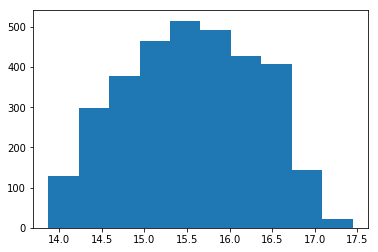

In [33]:
train_filter = train[train.salary > 1000000]
plt.hist(train_filter['log_adj'])

(array([44., 50., 47., 55., 71., 55., 47., 49., 38.,  7.]),
 array([6.0211893 , 6.1741805 , 6.3271717 , 6.4801629 , 6.6331541 ,
        6.78614531, 6.93913651, 7.09212771, 7.24511891, 7.39811011,
        7.55110131]),
 <a list of 10 Patch objects>)

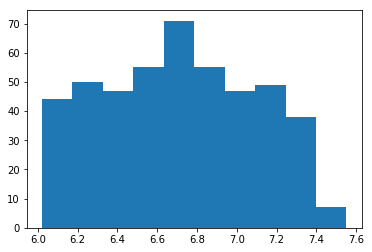

In [100]:
test_filter = test[test.salary > 1000000]

plt.hist(test_filter['log10_adj'])

In [61]:
train['adj_salary'] = train.apply(inflation_calc,axis=1)
train['log_adj'] = np.log(train['adj_salary'])

test['adj_salary'] = test.apply(inflation_calc,axis=1)
test['log_adj'] = np.log(test['adj_salary'])

train_filter = train[train.salary > 1000000]
test_filter = test[test.salary > 1000000]


min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(train_filter[norm_cols])
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = norm_cols
train_X_f = df_normalized


np_scaled = min_max_scaler.fit_transform(test_filter[norm_cols])
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = norm_cols
test_X_f = df_normalized

train_y_f = train_filter['log_adj']
test_y_f = test_filter['log_adj']

lr = LinearRegression()

lr.fit(train_X_f, train_y_f)

preds = lr.predict(test_X_f)

error = np.sqrt(MSE(test_y_f,preds))

print((error))
print(np.exp(error))

1.1365650995009282
3.1160466515196212


In [50]:
test_y_f.shape

(463,)

In [57]:
lr = LinearRegression()

lr.fit(train_X_f, train_y_f)

preds = lr.predict(test_X_f)

error = np.sqrt(MSE(test_y_f,preds))

print((error))
print(np.exp(error))

0.4936039510370742
1.6382096210748078


In [62]:
train['adj_salary'] = train.apply(inflation_calc,axis=1)
train['log10_adj'] = np.log10(train['adj_salary'])

test['adj_salary'] = test.apply(inflation_calc,axis=1)
test['log10_adj'] = np.log10(test['adj_salary'])

train_filter = train[train.salary > 1000000]
test_filter = test[test.salary > 1000000]



min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(train_filter[norm_cols])
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = norm_cols
train_X_f = df_normalized


np_scaled = min_max_scaler.fit_transform(test_filter[norm_cols])
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = norm_cols
test_X_f = df_normalized

train_y_f = train_filter['log10_adj']
test_y_f = test_filter['log10_adj']

lr = LinearRegression()

lr.fit(train_X_f, train_y_f)

preds = lr.predict(test_X_f)

error = np.sqrt(MSE(test_y_f,preds))

print((error))

print(10**error)

0.4936039510370742
3.1160466515196266


(array([128., 298., 377., 464., 515., 492., 427., 407., 144.,  21.]),
 array([6.02489921, 6.18004834, 6.33519746, 6.49034659, 6.64549572,
        6.80064485, 6.95579397, 7.1109431 , 7.26609223, 7.42124136,
        7.57639048]),
 <a list of 10 Patch objects>)

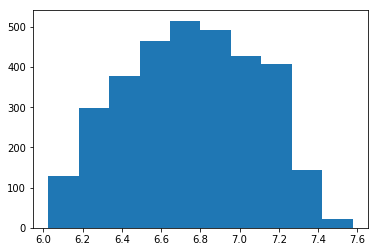

In [59]:
plt.hist(train_filter['log10_adj'])

(array([128., 298., 377., 464., 515., 492., 427., 407., 144.,  21.]),
 array([13.8728431 , 14.23008717, 14.58733124, 14.94457531, 15.30181938,
        15.65906345, 16.01630751, 16.37355158, 16.73079565, 17.08803972,
        17.44528379]),
 <a list of 10 Patch objects>)

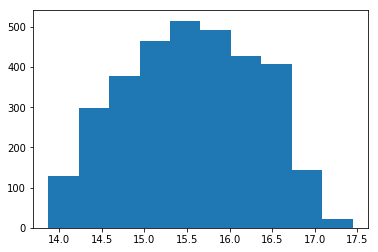

In [60]:
plt.hist(train_filter['log_adj'])

In [119]:
def train_and_test(train,test,cols,cutoff = 1000000):
    train_filter = train[train.salary > cutoff]
    test_filter = test[test.salary > cutoff]
    
    
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(train_filter[cols])
    df_normalized = pd.DataFrame(np_scaled)
    df_normalized.columns = cols
    train_X_f = df_normalized


    np_scaled = min_max_scaler.fit_transform(test_filter[cols])
    df_normalized = pd.DataFrame(np_scaled)
    df_normalized.columns = cols
    test_X_f = df_normalized
    
    train_y_f = train_filter['log10_adj']
    test_y_f = test_filter['log10_adj']
    
    lr = LinearRegression()

    lr.fit(train_X_f, train_y_f)

    preds = lr.predict(test_X_f)

    error = np.sqrt(MSE(test_y_f,preds))
    
    return "The error is a factor of {0}".format(round(10**error,2))

In [106]:
print(train_and_test(train,test,norm_cols,1000000))

The error is a factor of 1.19


In [94]:
test_cutoffs = [(i+1)*100000 for i in range(20)]

In [120]:
for i in test_cutoffs:
    print("Minimum Salary = ${0}".format(i)),
    print(train_and_test(train,test,norm_cols,i))

Minimum Salary = $100000
The error is a factor of 5.72
Minimum Salary = $200000
The error is a factor of 5.67
Minimum Salary = $300000
The error is a factor of 5.17
Minimum Salary = $400000
The error is a factor of 3.75
Minimum Salary = $500000
The error is a factor of 4.59
Minimum Salary = $600000
The error is a factor of 2.46
Minimum Salary = $700000
The error is a factor of 2.49
Minimum Salary = $800000
The error is a factor of 2.5
Minimum Salary = $900000
The error is a factor of 2.43
Minimum Salary = $1000000
The error is a factor of 2.3
Minimum Salary = $1100000
The error is a factor of 2.23
Minimum Salary = $1200000
The error is a factor of 2.25
Minimum Salary = $1300000
The error is a factor of 2.23
Minimum Salary = $1400000
The error is a factor of 2.19
Minimum Salary = $1500000
The error is a factor of 2.06
Minimum Salary = $1600000
The error is a factor of 2.04
Minimum Salary = $1700000
The error is a factor of 2.06
Minimum Salary = $1800000
The error is a factor of 2.08
Min

In [104]:
train.groupby(['year'])['adj_salary'].min()

year
2000    284692.218351
2001    276862.257864
2002    272537.247054
2003    220621.324636
2004    389285.336157
2005    396609.933436
2006    364761.904762
2007    449236.527091
2008    444010.533992
2009    457021.399572
2010    449645.962505
2011    451143.109910
2012    512459.384827
2013    515583.562632
2014    517707.488510
2015    524850.116236
2016    518309.389687
Name: adj_salary, dtype: float64

In [127]:
test[test['adj_salary'] == test['adj_salary'].max()]

,rk,name,age,tm,g,pa,rbat,rbaser,rdp,rfield,...,orar,salary,acquired,pos summary,bat_hand,year,log_sal,adj_salary,log_adj,log10_adj
567,568,Jason Heyward,27,CHC,126,481.0,-7,-1,3,18,...,6.0,28166667.0,Free Agency,*98,lhb,2017,7.449735,28166667.0,17.15365,7.449735


In [126]:
type(test['adj_salary'].nlargest(10))

pandas.core.series.Series

In [129]:
train['acquired'].value_counts()

Traded                    1825
Free Agency               1546
Amateur Draft             1439
Amateur Free Agent         326
Waivers                    100
Purchased                   72
Rule 5 Draft                40
Expansion Draft             14
Conditional Deal            14
Amateur Draft--no sign      11
MinorLg Draft                5
Rule 5 returned              3
Name: acquired, dtype: int64

In [131]:
train['acquired'].map(acquired_dict).head()

0     dr
3     tr
6     dr
10    tr
12    fa
Name: acquired, dtype: object